Лабораторная №3

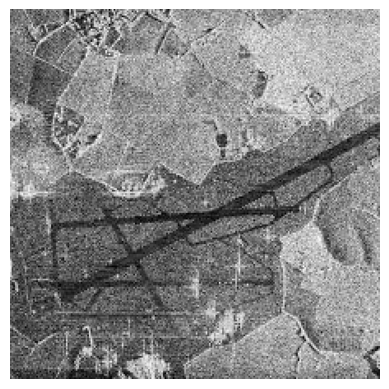

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.axis('off')
plt.imshow(image_gray, cmap="gray")

Точечная бинаризация

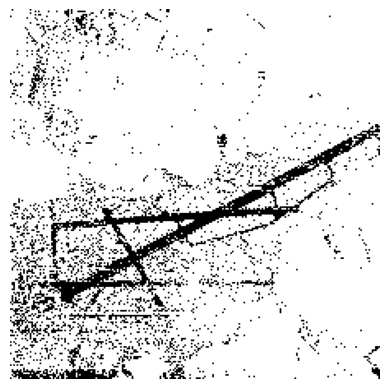

In [8]:
import copy

img = copy.deepcopy(image_gray)
T = 70
img[image_gray < T] = 0
img[image_gray >= T] = 255

plt.axis('off')
plt.imshow(img, cmap="gray")

Бинаризация Отсу

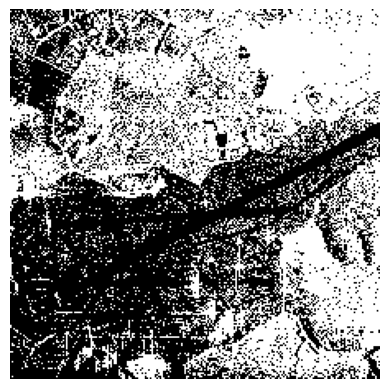

In [14]:

_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(th2, cmap="gray")

Адаптивная бинаризация

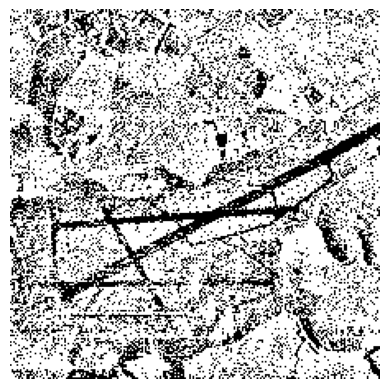

In [17]:
img3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.axis('off')
plt.imshow(img3, cmap="gray")

Оператор Собеля

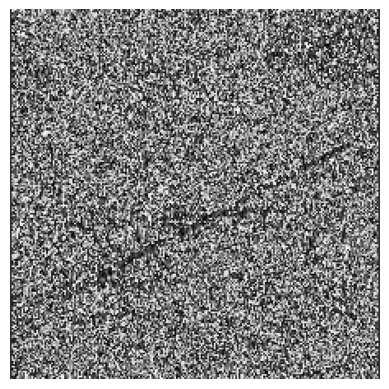

In [19]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.axis('off')
plt.imshow((x - x.min())*255, cmap="gray")

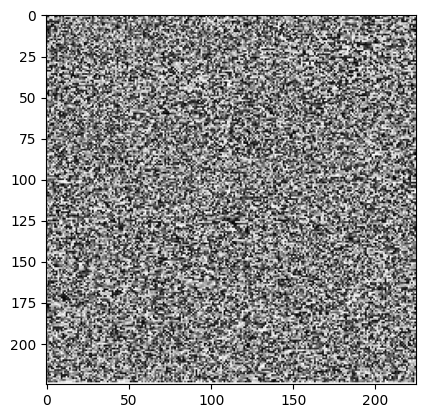

In [20]:
plt.imshow((y - y.min())*255, cmap="gray")

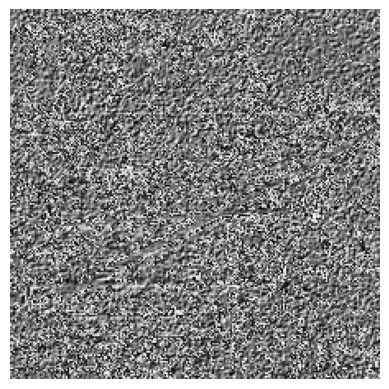

In [23]:
grad = cv2.addWeighted(x, 0.5, y, 0.5,0.0)
plt.axis('off')
plt.imshow((grad - grad.min())*255, cmap="gray")

Canny

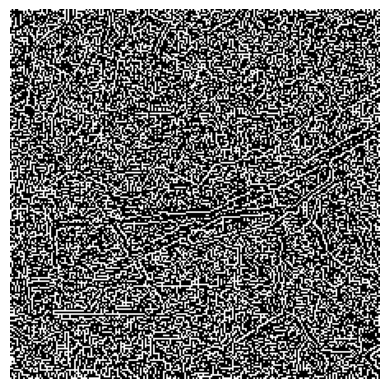

In [25]:
edges = cv2.Canny(image_gray,0,50)
plt.axis('off')
plt.imshow(edges, cmap="gray")

Преобразование Хафа

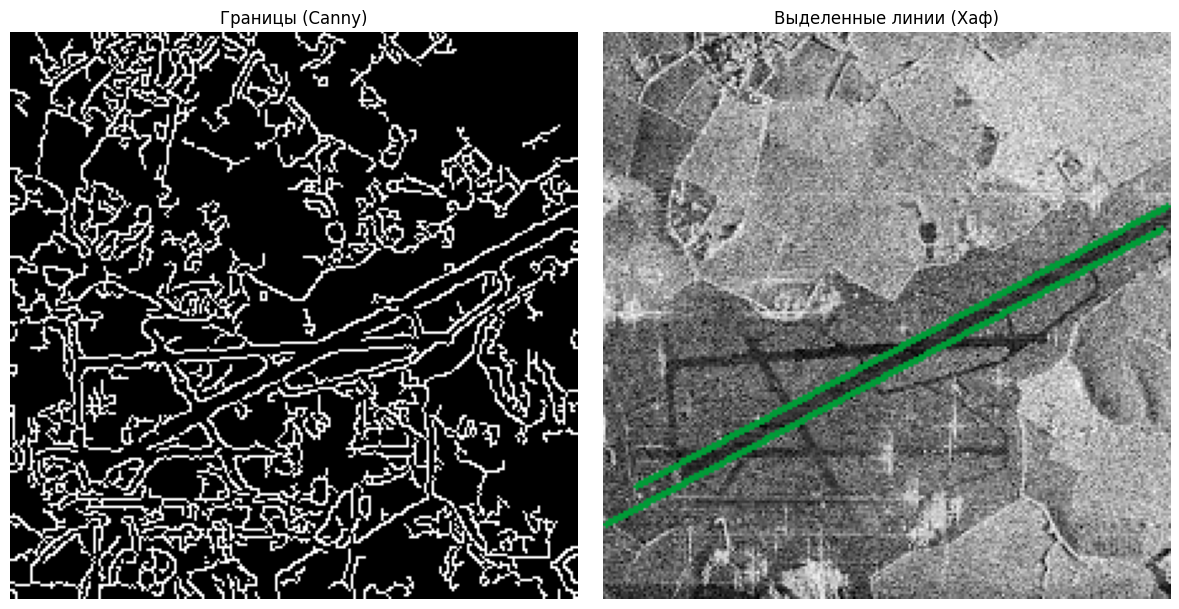

In [ ]:
image = cv2.imread('sar_3.jpg')   # поменяй имя если файл другой
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(image_gray, (5,5), 0)

edges = cv2.Canny(blur, 50, 150)

# 4. Преобразование Хафа
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=120,
    minLineLength=30,
    maxLineGap=20
)

# 5. Рисуем линии на изображении
result = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (0, 155, 55), 2)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Границы (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Выделенные линии (Хаф)") 
plt.imshow(result)
plt.axis('off')

plt.tight_layout()
plt.show()